# The Sparks Foundation - Exploratory Data Analysis - Retail 
Task - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

Author - Rubal Bansal

### Import Libraries
Importing all libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The Data
Reading data in the SampleSuperstore.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
print("Data imported")

df.head()

Data imported


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<b>Note:</b> There are no null values and also no categorial features.

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for duplicates

In [6]:
print("Duplucate Rows=",df.duplicated().astype(int).sum())
df = df.drop_duplicates()
df

Duplucate Rows= 17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

* we can see there is only one country,so we can remove country and also Postal code column because it has no use.

In [8]:
col = ['Country','Postal Code']
data = df.drop(columns = col,axis = 1)

In [9]:
# correlation 
correlation = data.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


## Exploratory Data Analysis and Visualisation


### Category vise Profits & Sales

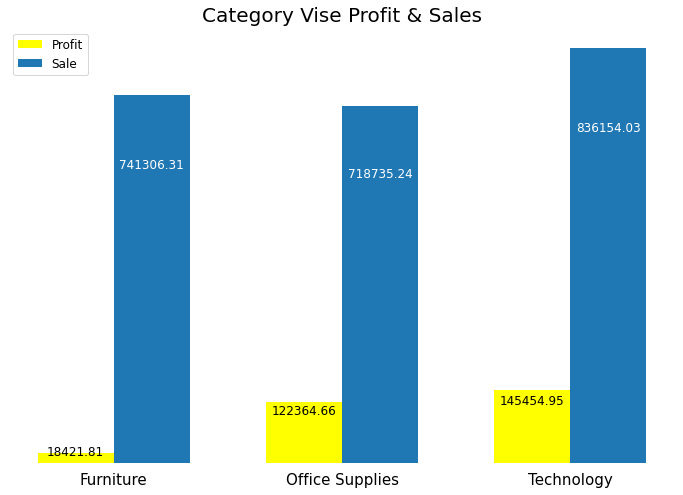

In [10]:
category = df.groupby(by='Category').agg('sum').reset_index()
category
net_profit = category['Profit']
sales = category['Sales']
x = np.array(range(0,9,3))

fig1 = plt.figure(figsize=(12,8))
plt.title("Category Vise Profit & Sales",fontsize=20)
bars = plt.bar(x-0.5,net_profit,width=1,color='yellow',label='Profit')
bars2 = plt.bar(x+0.5,category['Sales'],width=1,label='Sale')

ax = plt.gca().axes
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelsize=12)

for bar,bar2,profit,sale,label in zip(bars,bars2,net_profit,category['Sales'],category['Category'].unique()):
    
    plt.gca().axes.text(bar.get_x()+bar.get_width()/2,profit*0.8,str(round(profit,2)),horizontalalignment='center',color='black',fontsize=12)
    plt.gca().axes.text(bar2.get_x()+bar.get_width()/2,sale*0.8,str(round(sale,2)),horizontalalignment='center',color='white',fontsize=12)
    plt.gca().axes.text(bar2.get_x(),-45000,label,horizontalalignment='center',color='black',fontsize=15)
plt.legend(fontsize=12)
plt.show()

### Profit & Sales of Each Sub-Categoy

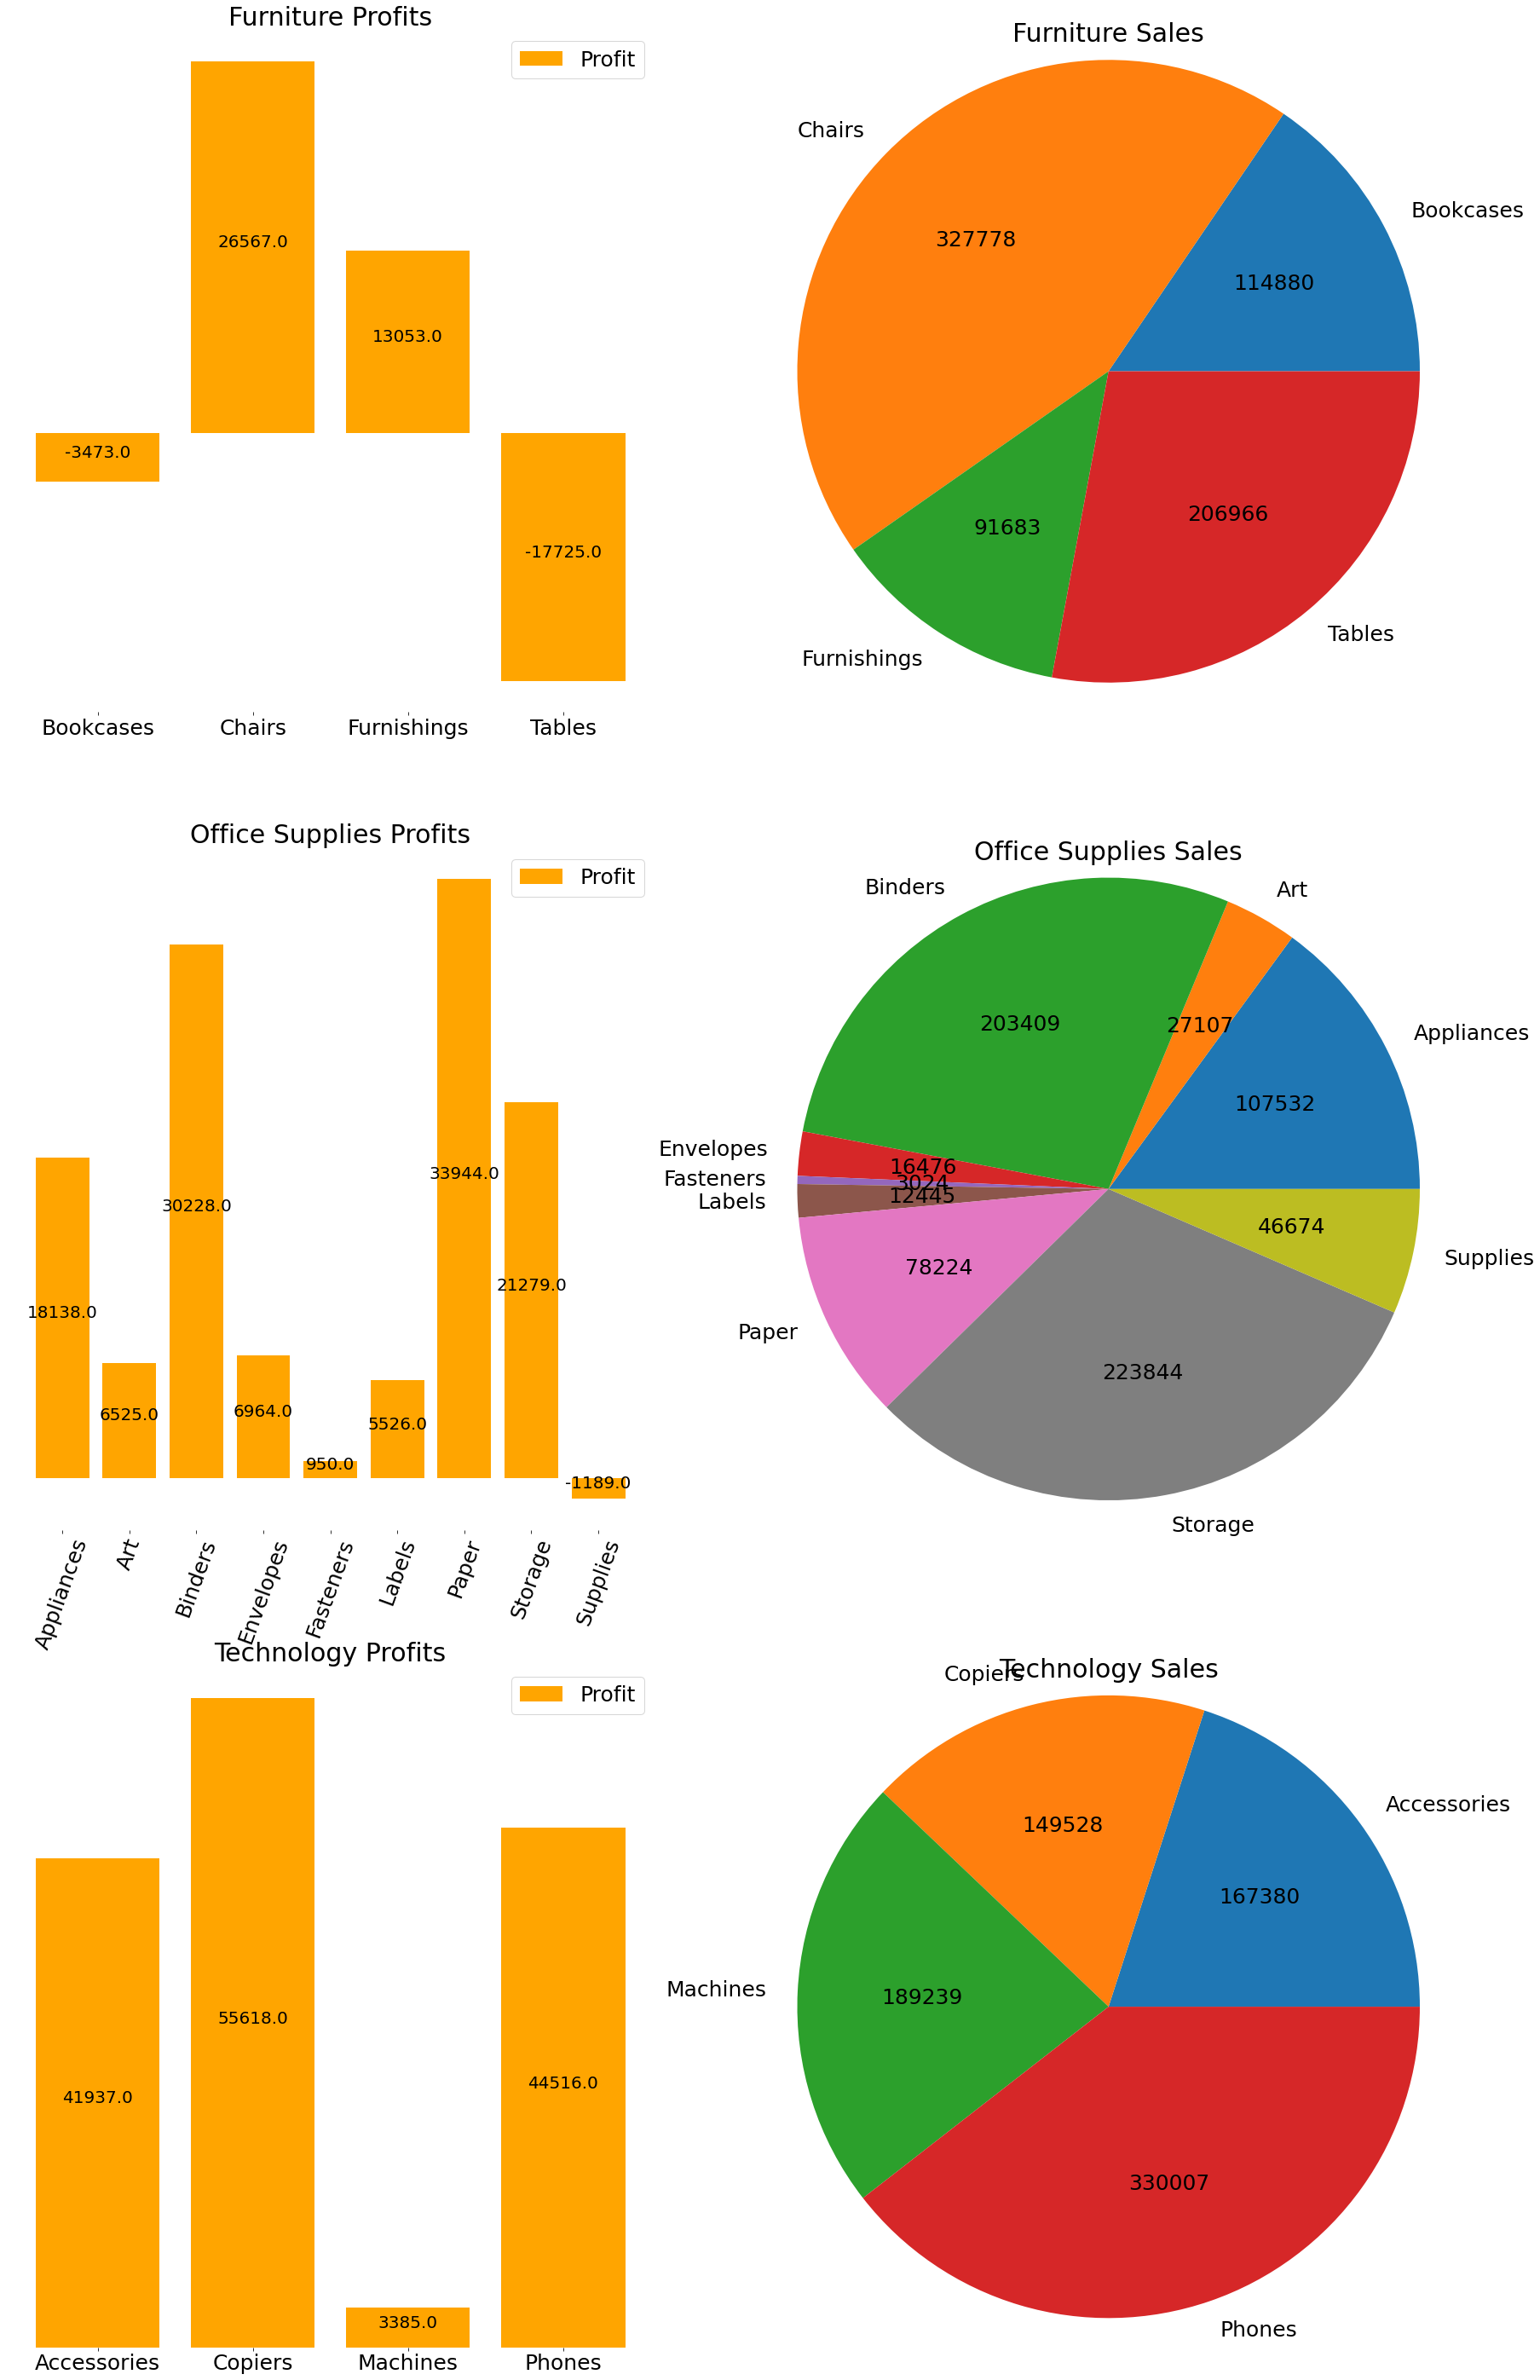

In [11]:
sub_cat = df.groupby(by = ['Category','Sub-Category']).agg(sum).reset_index()
mainCategories = sub_cat['Category'].unique()
fig,axes = plt.subplots(len(mainCategories),2,figsize=(30,50))
#plt.title("Subcategory vise Profit")
for col in range(2):
    for row,cat in zip(range(3),mainCategories):
        ax = axes[row][col]
        if col == 0:
            
            ax.tick_params(labelsize=25)
            ax.set_title(str(cat)+" Profits",fontsize=30)
            ax.get_yaxis().set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            
            temp = sub_cat[sub_cat['Category']==cat]
            netProfit = temp['Profit']
            bars = ax.bar(temp['Sub-Category'],netProfit,color='orange',label='Profit')
            ax.legend(fontsize=25)
            if len(bars) > 5:
                ax.xaxis.set_tick_params(rotation=70)
            for bar,prof in zip(bars,netProfit):
                h = 1 if prof > 0 else -1
                ax.text(bar.get_x()+bar.get_width()/2,prof*0.5,str(round(prof,0)),horizontalalignment='center',color='black',fontsize=20)
        else:
            ax.set_title(str(cat)+' Sales',fontsize=30)
            def value(val):
                s = sub_cat[sub_cat['Category']==cat]['Sales'].sum()
                return int(round(s*val/100,0))
            sales = sub_cat[sub_cat['Category']==cat]['Sales']
            labels = sub_cat[sub_cat['Category']==cat]['Sub-Category']
            ax.pie(sales,labels=labels,autopct=value,radius=1.2,textprops={'fontsize':'25'})

### Profit's in Each Region

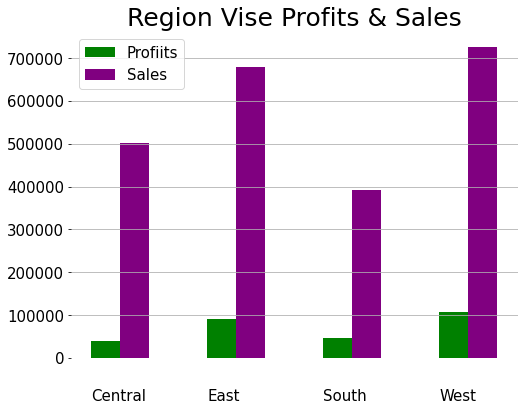

In [12]:
region = df.groupby('Region').agg(sum).reset_index()
labels = region['Region']
values = [region['Profit'] ,region['Sales']]
rg = region['Region']

plt.figure(figsize=(8,6))
plt.title("Region Vise Profits & Sales",fontsize=25)
x = np.array(range(0,8,2))

bars1 = plt.bar(x-0.5,values[0],width=0.5,label='Profiits',color='green')
bars2 = plt.bar(x,values[1],width=0.5,label='Sales',color='purple')
plt.yticks()
ax = plt.gca().axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
for bar1,bar2,txt in zip(bars1,bars2,rg):
    ax.text(bar1.get_x(),-100000,txt,fontsize=15)
plt.yticks(fontsize=15)    
plt.grid(axis='y')
plt.legend(fontsize=15)
plt.show()

In [13]:
# profits segment wise
sales_profit = df.groupby('Segment')
round(sales_profit.sum(),2)

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288269634,1160832.77,19497,820.51,134007.44
Corporate,164108306,706070.13,11591,476.85,91954.98
Home Office,97903137,429292.68,6732,261.83,60279.00


In [14]:
# Total
total_sales_profit = sales_profit.sum().iloc[:,[0,-1]].sum()
round(total_sales_profit,2)

Postal Code    5.502811e+08
Profit         2.862414e+05
dtype: float64

### Top 10 States by sales

In [15]:
top_10_sales = df.groupby('State').Sales.sum().nlargest(n = 10)
top_10_sales

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64

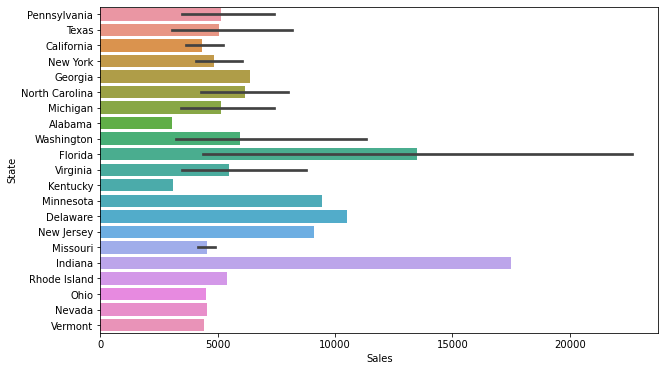

In [16]:
high_sale=df[df["Sales"]>3000]
high_sale.head()

plt.figure(figsize=(10,6))
sns.barplot(x=high_sale["Sales"],y=high_sale["State"],data=df)

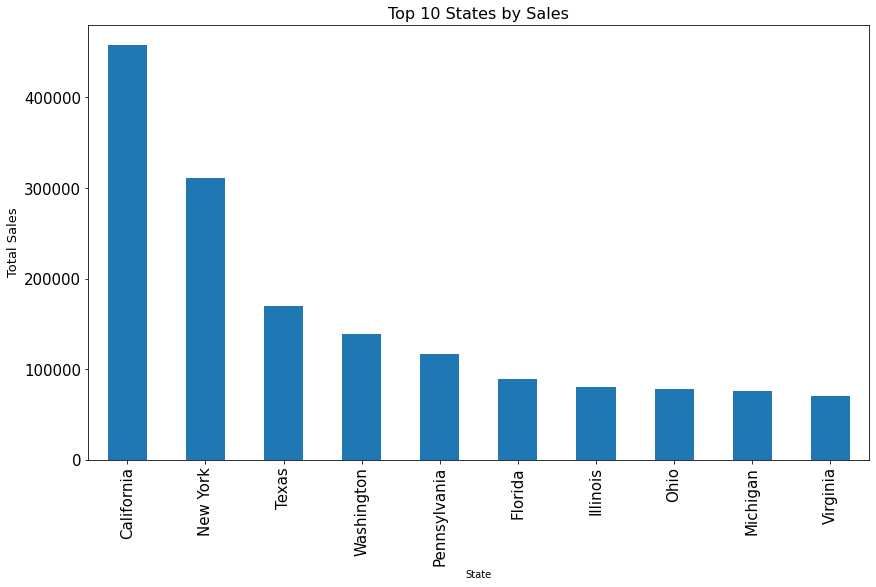

In [17]:
top_10_sales.plot.bar(figsize= (14,8),fontsize = 15)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

### Top 10 States by profits

In [18]:
top_10_profit = df.groupby('State').Profit.sum().nlargest(n = 10)
top_10_profit

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

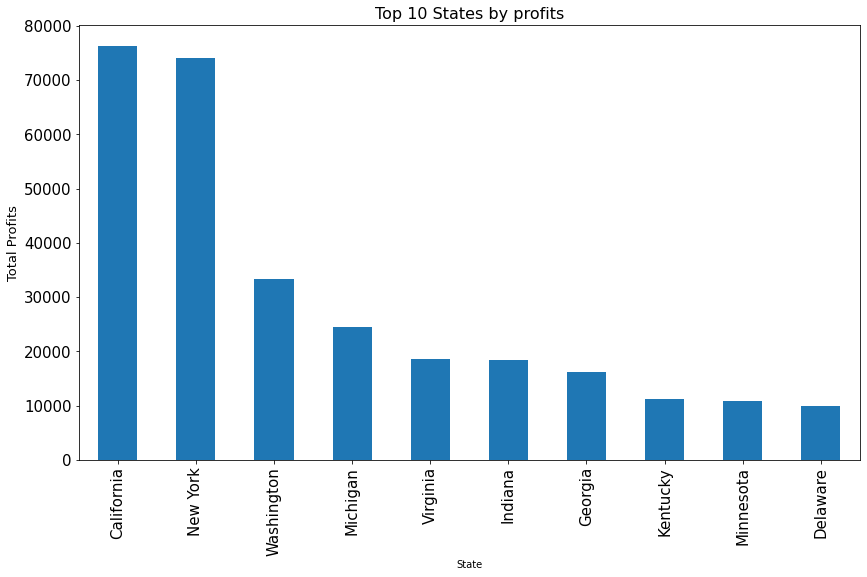

In [19]:
top_10_profit.plot.bar(figsize= (14,8),fontsize = 15)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by profits",fontsize =16)
plt.show()

* California and New York are far away in selling and making profits in comparison to other states

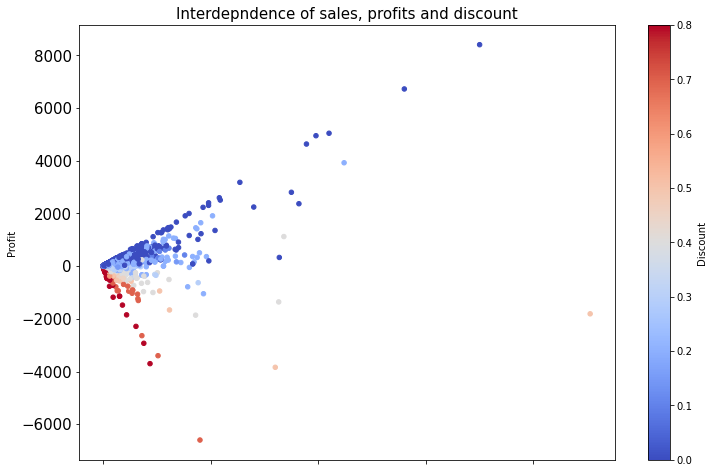

In [20]:
data.plot.scatter(x = 'Sales', y = 'Profit',c = 'Discount',cmap = 'coolwarm',figsize = (12,8),fontsize = 15)
plt.title('Interdepndence of sales, profits and discount',fontsize = 15)
plt.show()

* The plots are indicating that higher discount implies low profit amount and even loss(negative profit).

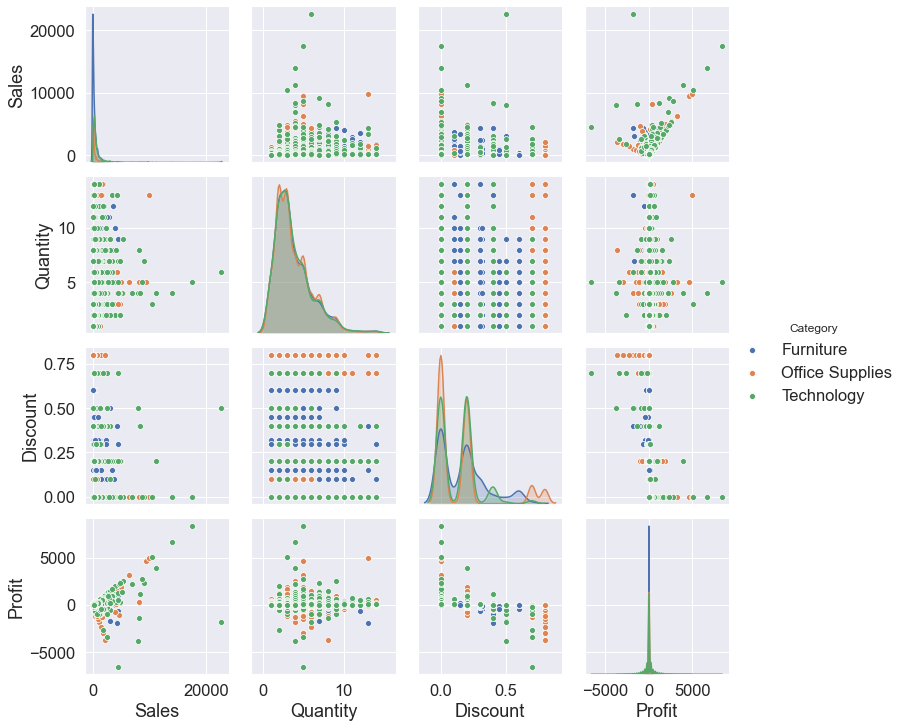

In [21]:
sns.set(font_scale=1.5)
financial_data = data.loc[:,['Sales','Quantity','Discount','Profit','Category']]
sns.pairplot(financial_data,hue = 'Category')

* From the above plot, we can see that there is some relation between profit and sales and also between profit and discount.we have already calculated the correlation and that indicated also the same.The plot also shows that most of the losses are in office supplies because of heavy discount offered.

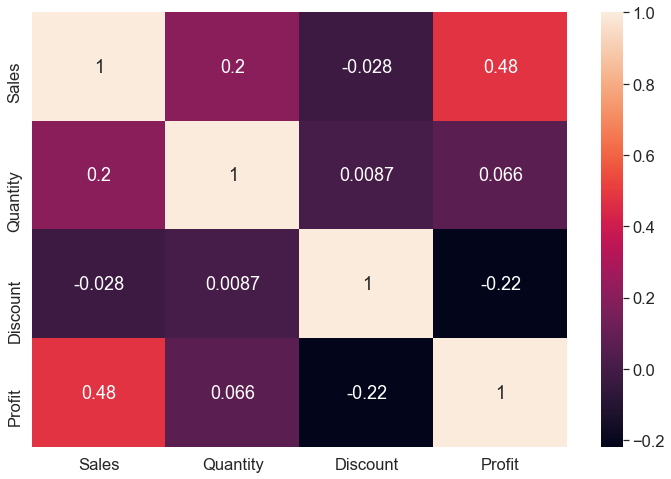

In [22]:
# Let's see a heatmap for now.
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.heatmap(correlation,annot = True)

* From Above map we infer that, sales and profits are positively correlated, also Discount and Profits are Negatively correlated

<Figure size 1008x576 with 0 Axes>

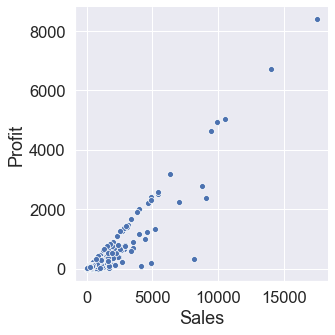

In [23]:
no_discount = data[data['Discount']==0]
plt.figure(figsize = (14,8))
sns.set(font_scale=1.5)
sns.relplot(data = no_discount,x = 'Sales',y = 'Profit')

* Thus,when discount is 0, the profit is increasing linearly with increase of sales.

### Let's see the heat map for no discount

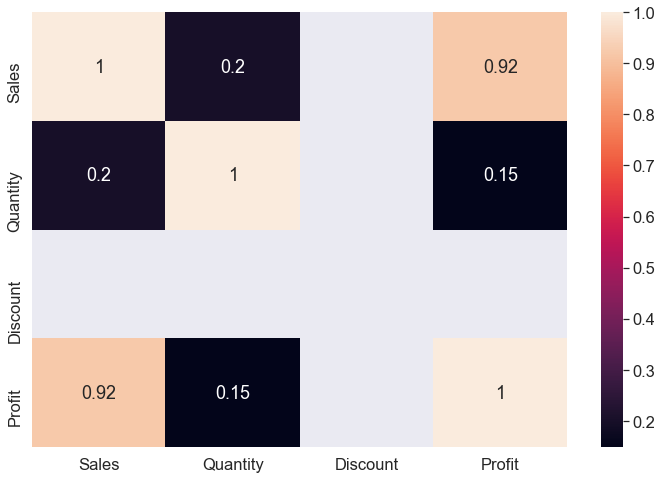

In [24]:
corr_no_discount = no_discount.corr()
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.heatmap(corr_no_discount,annot = True)

* Thus, the strong correlation between profit and sales increases from 0.48 to 0.92 if the discount = 0

<Figure size 864x576 with 0 Axes>

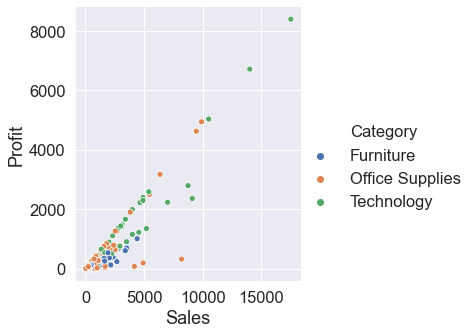

In [25]:
#Rel_plot with respect category
plt.figure(figsize = (12,8))
sns.relplot(x='Sales',y='Profit',hue='Category',data = no_discount)

* The plot shows that when no discount is offered, we are getting a little profit from office supplies while most of the profits are coming from technology section.

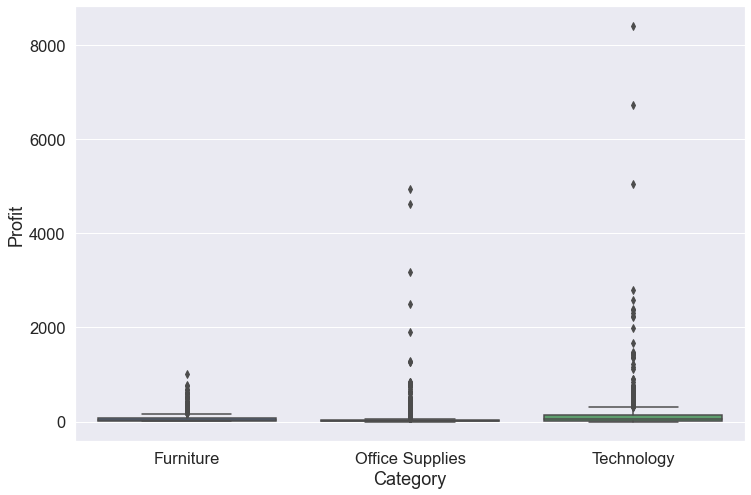

In [26]:
# BoxPlot
plt.figure(figsize = (12,8))
sns.boxplot(x='Category',y='Profit',data=no_discount)

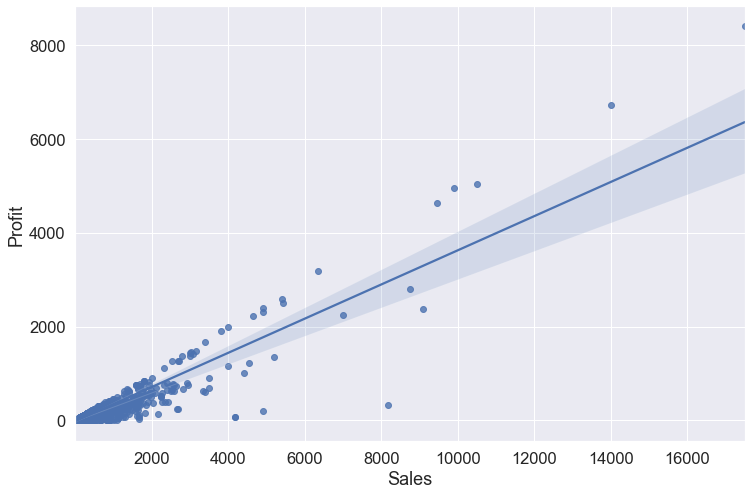

In [27]:
# Regression Plot 
plt.figure(figsize = (12,8))
sns.regplot(x = no_discount['Sales'],y= no_discount['Profit'])

<Figure size 864x576 with 0 Axes>

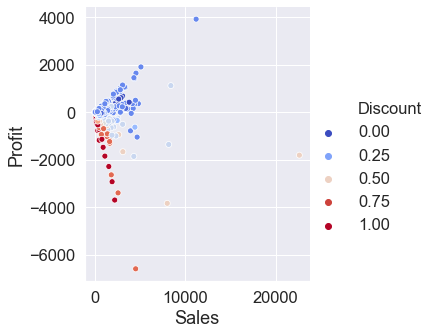

In [28]:
discount = data[data['Discount']!=0]
plt.figure(figsize = (12,8))
sns.relplot(data = discount,x = 'Sales',y = 'Profit',hue = 'Discount',palette = 'coolwarm')

* Observe that there is more number of sales when some discount is offered but the profit goes decreased.

<Figure size 864x576 with 0 Axes>

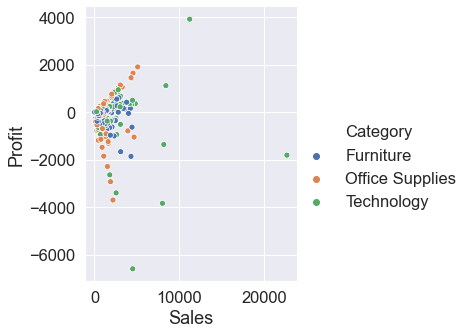

In [29]:
# Now let's check for different business sectors
plt.figure(figsize = (12,8))
sns.relplot(data = discount,x = 'Sales',y = 'Profit',hue = 'Category')

* We can see that there is some huge loss in office supplies and technology.

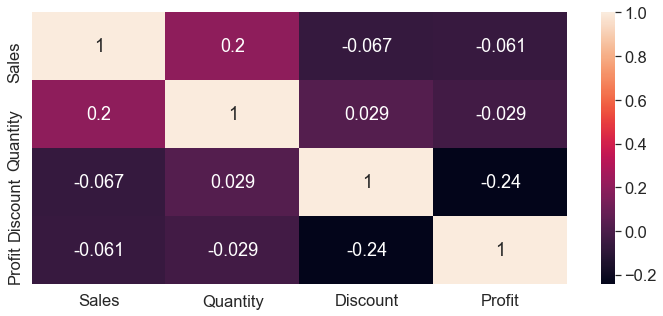

In [30]:
corr_discount = discount.corr()
plt.figure(figsize = (12,5))
sns.heatmap(corr_discount,annot = True)

* Again, we can see there is a negative correlation between profit and discount. Also when discounts are offered the correlation between sales and discount is negative unlike when no discounts are offered.

In [31]:
pivot=pd.pivot_table(discount,index='Sub-Category',values='Profit')
pivot

,Profit
Sub-Category,
Accessories,21.866388
Appliances,-25.875542
Art,3.849619
Binders,-7.667891
Bookcases,-56.834927
Chairs,9.666934
Copiers,436.123696
Envelopes,19.482277
Fasteners,3.340596


<Figure size 864x576 with 0 Axes>

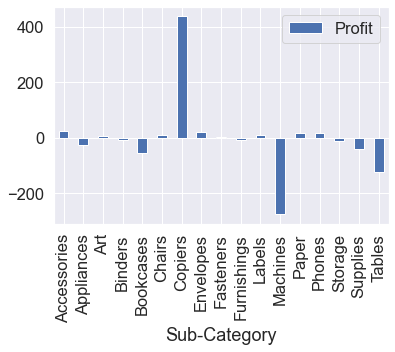

In [32]:
plt.figure(figsize = (12,8))
pivot.plot.bar()

* We observed that copiers had the highest profit while machines had the greatest loss.

In [33]:
pivot_sales=pd.pivot_table(discount,index='Sub-Category',values='Sales')
pivot_sales

,Sales
Sub-Category,
Accessories,161.217132
Appliances,151.107544
Art,30.550846
Binders,102.598894
Bookcases,493.714383
Chairs,490.904764
Copiers,1588.670652
Envelopes,57.548549
Fasteners,13.499326


<Figure size 864x576 with 0 Axes>

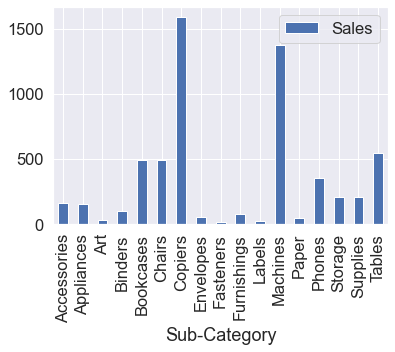

In [34]:
plt.figure(figsize = (12,8))
pivot_sales.plot.bar()
plt.show()

* From the above graph, observe that copiers had highest sale and Machines had second highest sales.

* Also in above two graph 'Machines' had second highest sale but still we are in loss because of huge discounts offered and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.We need to concentrate on these sub-category businesses.

### Distribution of Profits across different region

Text(0.5, 1.0, 'Profit across different region(by segment)')

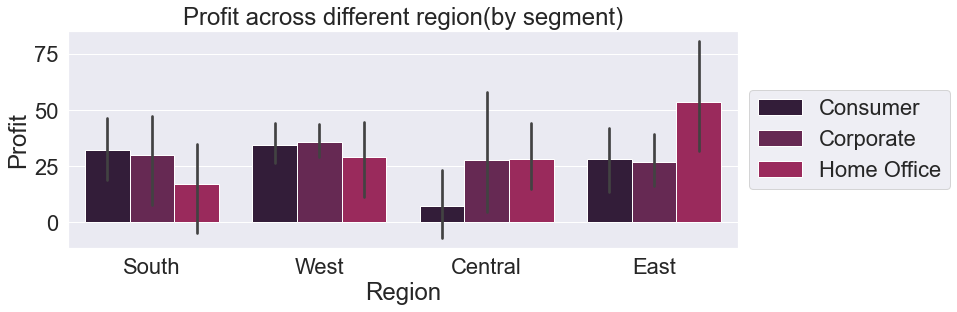

In [35]:
plt.figure(figsize = (12,4))
sns.set(font_scale=2, palette= "rocket")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Profit across different region(by segment)')

* Overall each segment is profitable.

### Distribution of Profits across different region with respect to category

Text(0.5, 1.0, 'Profit across different region(by category)')

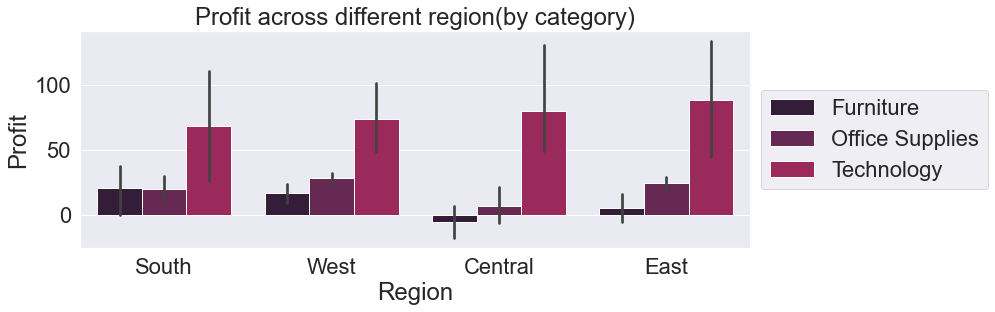

In [36]:
plt.figure(figsize = (12,4))
sns.set(font_scale=2, palette= "rocket")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Profit across different region(by category)')

* We can see that in central region,the furniture sector is in loss.Let's investigate it further.

In [37]:
# Data for the central region
central_data = list(data.groupby('Region'))[0][1]
central_data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
16,Standard Class,Consumer,Madison,Wisconsin,Central,Office Supplies,Storage,665.8800,6,0.00,13.3176
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.4600,7,0.00,5.0596
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.3400,7,0.00,15.6884
...,...,...,...,...,...,...,...,...,...,...,...
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742
9962,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9972,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042
9982,Standard Class,Consumer,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132


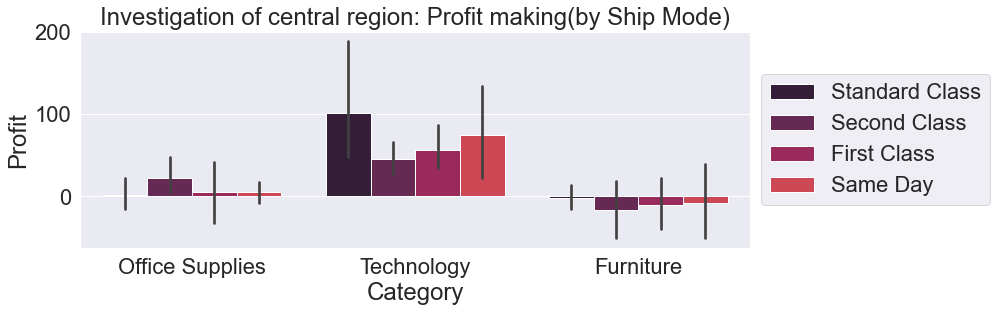

In [38]:
plt.figure(figsize = (12,4))
sns.set(font_scale=2, palette= "rocket")
sns.barplot(data = central_data, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

* We can see from the plot that there are losses are in all shipping mode in central region in furniture sector.

In [39]:
# Slicing of furniture data of central region
central_data_furniture = list(list(data.groupby('Region'))[0][1].groupby('Category'))[0][1]

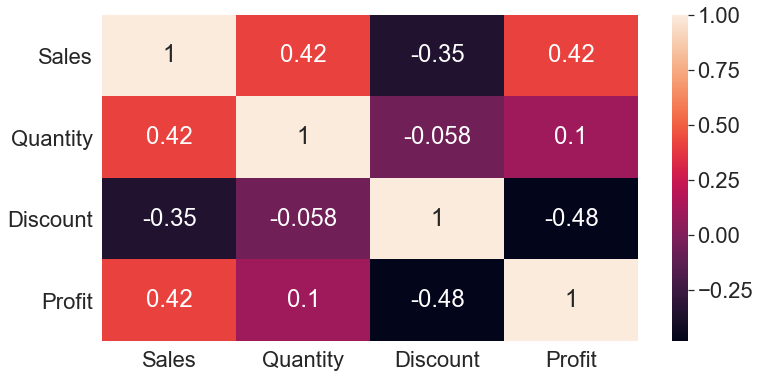

In [40]:
plt.figure(figsize = (12,6))
sns.heatmap(central_data_furniture.corr(),annot = True)

* The correlation between discount and profit is negative. The purpose of giving discount is to increase sales but the correlation between sales and discount is also negative which means our objective of giving discount had not been succeeded.

### Performance by State in Central Region

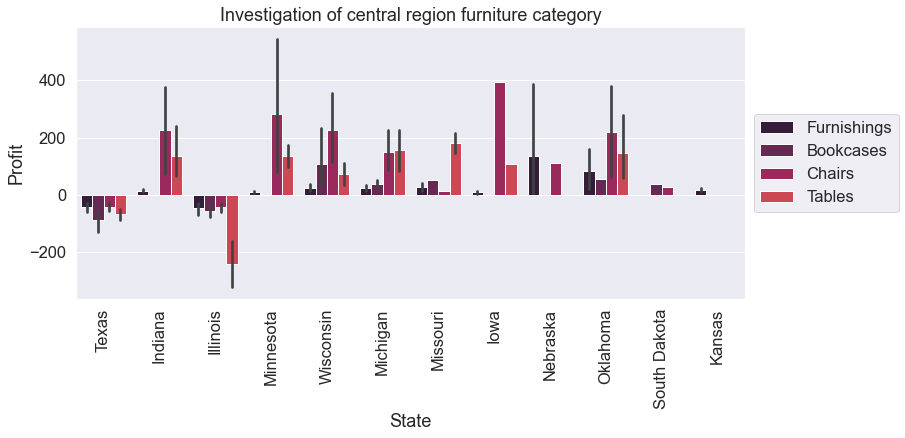

In [41]:
plt.figure(figsize = (12,5))
sns.set(font_scale=1.5, palette= "rocket")
sns.barplot(data = central_data_furniture, x = "State",y = "Profit" ,hue = "Sub-Category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Investigation of central region furniture category")
plt.xticks(rotation = 90)
plt.show()

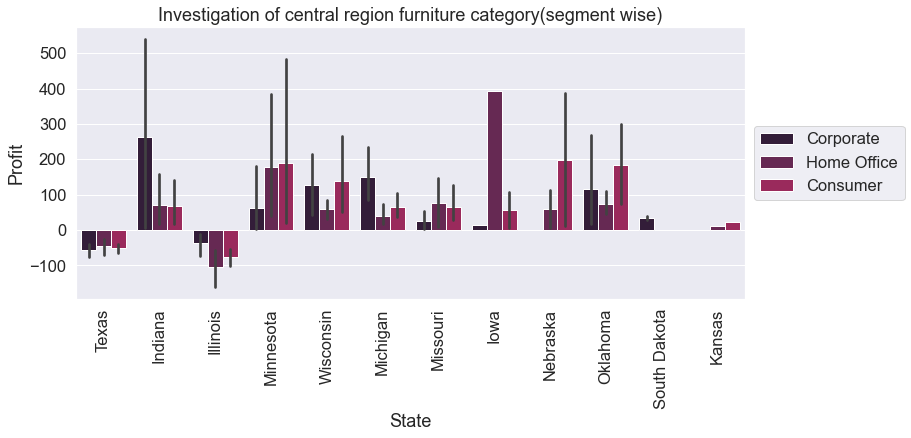

In [42]:
plt.figure(figsize = (12,5))
sns.set(font_scale=1.5, palette= "rocket")
sns.barplot(data = central_data_furniture, x = "State",y = "Profit" ,hue = "Segment")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Investigation of central region furniture category(segment wise)")
plt.xticks(rotation = 90)
plt.show()

* The above plot shows Texas and illinois are the only two states with losses in furniture category in the Central Region.
There is a huge loss in table category in illinois.

* Earlier, We have seen that more discount is triggering losses. Let's see if this is a reason behind loss in these two states.

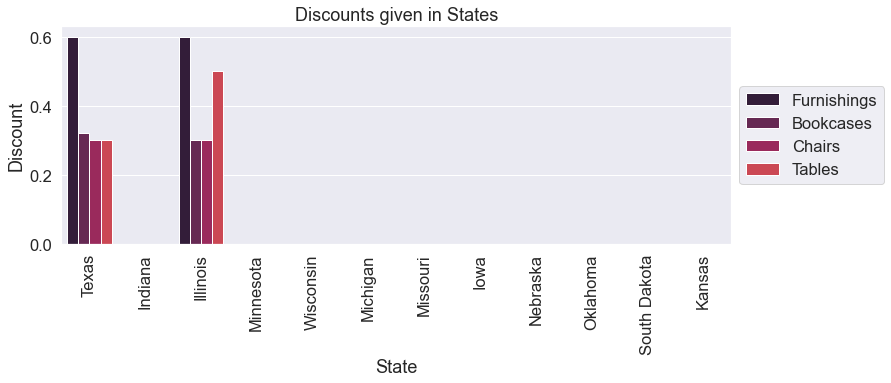

In [43]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "rocket")
sns.barplot(data = central_data_furniture, x = "State",y = "Discount" ,hue = "Sub-Category")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Discounts given in States")
plt.xticks(rotation = 90)
plt.show()

* Texas and Illinois are the only two states that is providing discounts and that too huge.
    1. 60% on Furnishings
    2. 30% on Bookcases and Chairs
    3. 50% disount on Tables in Illinois and 30% in Texas

In [44]:
# Let's dive into the cities of these two states
illinois = list(list(list(data.groupby('Region'))[0][1].groupby('Category'))[0][1].groupby('State'))[0][1]
texas = list(list(list(data.groupby('Region'))[0][1].groupby('Category'))[0][1].groupby('State'))[-2][1]

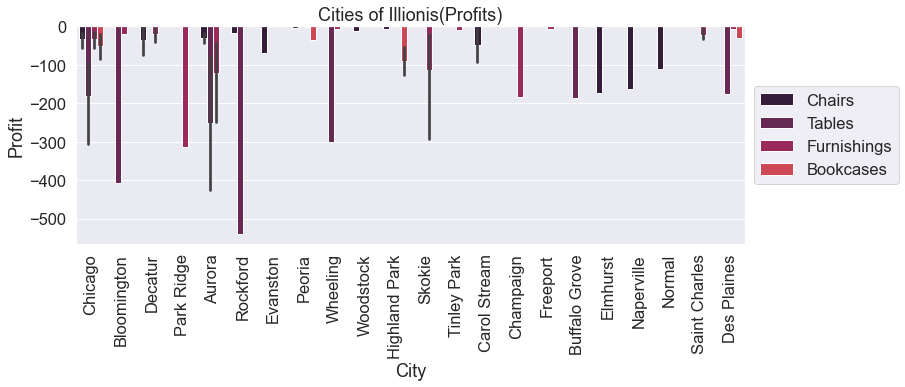

In [45]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= 'rocket')
sns.barplot(data = illinois, x = 'City', y = 'Profit', hue = 'Sub-Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Cities of Illionis(Profits)')
plt.xticks(rotation = 90)
plt.show()

* All cities of Illinois are in loss and most of the losses are occuring in tables.

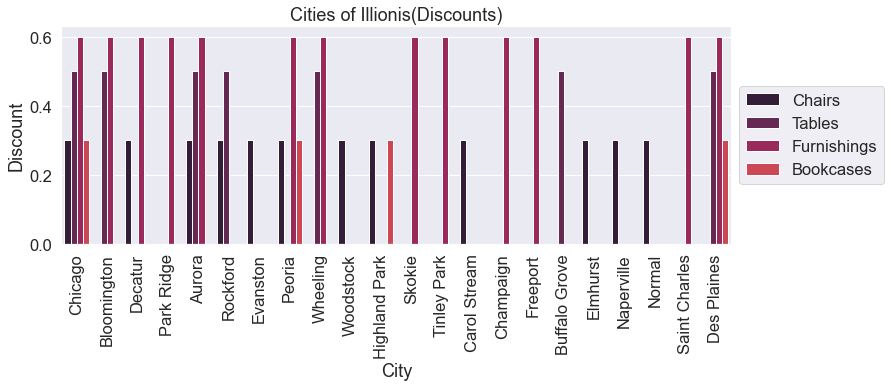

In [46]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= 'rocket')
sns.barplot(data = illinois, x = 'City', y = 'Discount', hue = 'Sub-Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Cities of Illionis(Discounts)')
plt.xticks(rotation = 90)
plt.show()

* A discount of 30% or more have been given in the cities and most of them are in furnishing.

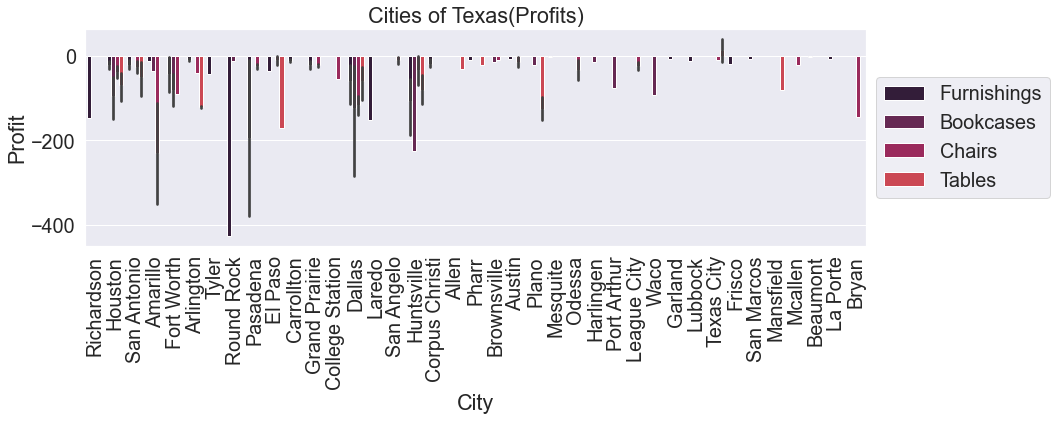

In [47]:
plt.figure(figsize = (14,4))
sns.set(font_scale= 1.8, palette= 'rocket')
sns.barplot(data = texas, x = 'City', y = 'Profit', hue = 'Sub-Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Cities of Texas(Profits)')
plt.xticks(rotation = 90)
plt.show()

* Except one city for furnishings, All cities of Texas are in loss too and most of the losses are in furnishing category.

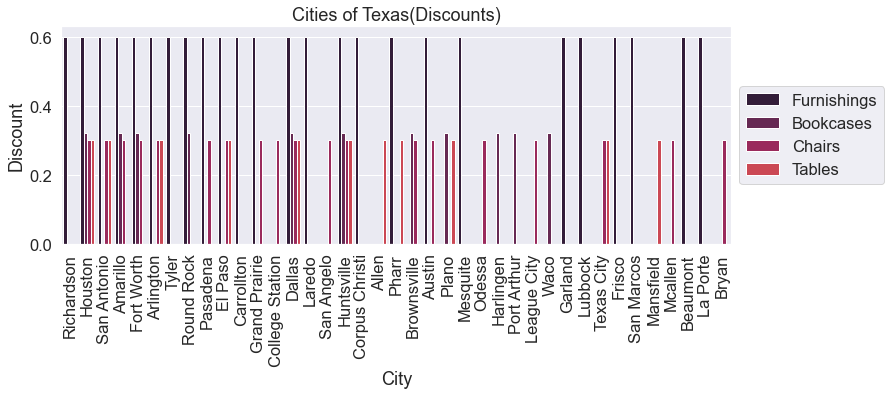

In [48]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= 'rocket')
sns.barplot(data = texas, x = 'City', y = 'Discount', hue = 'Sub-Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Cities of Texas(Discounts)')
plt.xticks(rotation = 90)
plt.show()

* Again, a discount of 30% or more have been given in the cities and most of them are in furnishing.

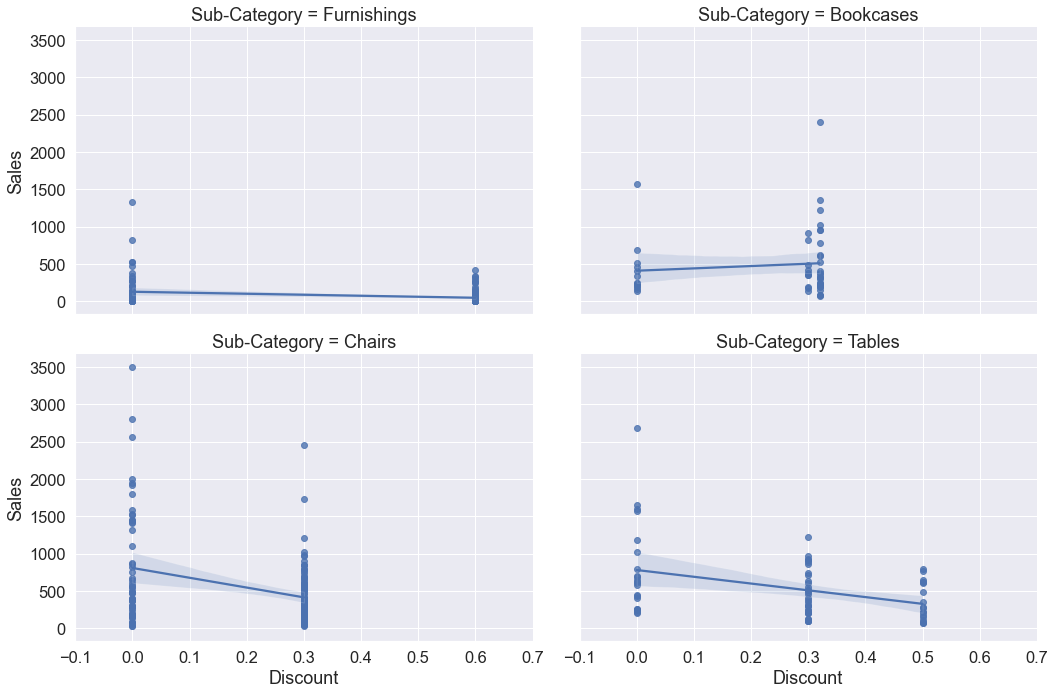

In [49]:
# Let's see if these discounts are worth giving for i.e if they are really increases sales.

sns.set(font_scale=1.5)
plot = sns.lmplot(data = central_data_furniture , x = "Discount", y ="Sales", col ="Sub-Category", col_wrap= 2,aspect = 1.5,height = 5)
plot.set(xlim = (-0.1,0.7))
plt.tight_layout()
plt.show()

* Except bookcases, sales for all other sub-category is going down with increase of discount.

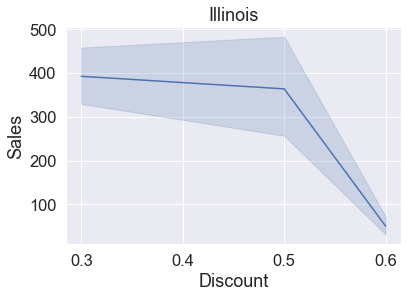

In [50]:
sns.lineplot(data = illinois, x = 'Discount', y = 'Sales')
plt.title('Illinois')
plt.show()

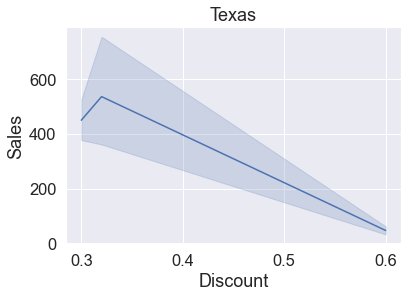

In [51]:
sns.lineplot(data = texas, x = 'Discount', y = 'Sales')
plt.title('Texas')
plt.show()

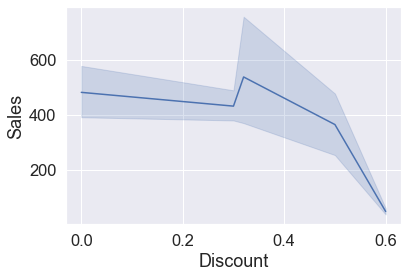

In [52]:
# Joint plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.lineplot(data = central_data_furniture , x = "Discount", y ="Sales")
plt.show()

* The overall sales is going down even after giving discounts.This justifies the negative correlation between discounts and sales.

Text(0, 0.5, 'Number of Customers')

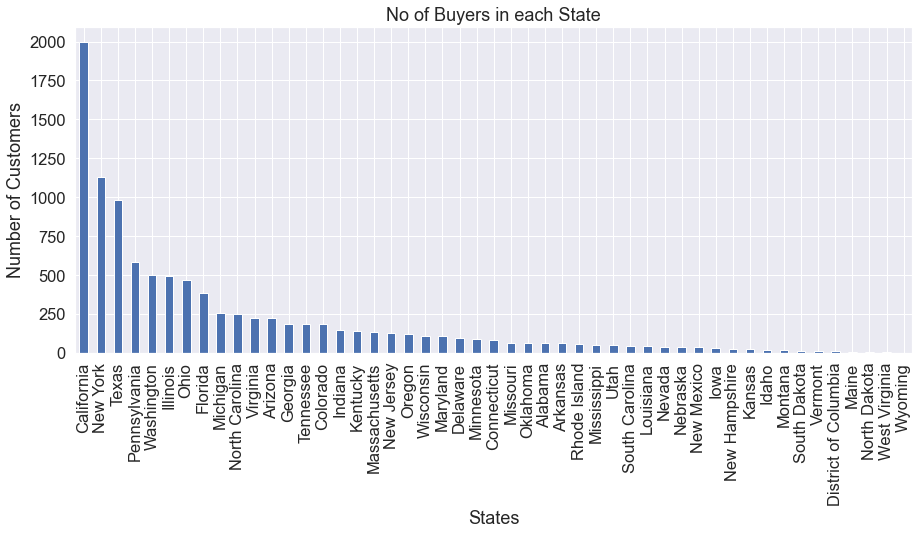

In [53]:
# Some more review of the data
plt.figure(figsize = (15,6))
sns.set(font_scale=1.5)
state = data['State'].value_counts()
state.plot(kind="bar")
plt.title("No of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Customers")

* "Wyoming", "West Virginia" and "North Dakota" have very few buyers.

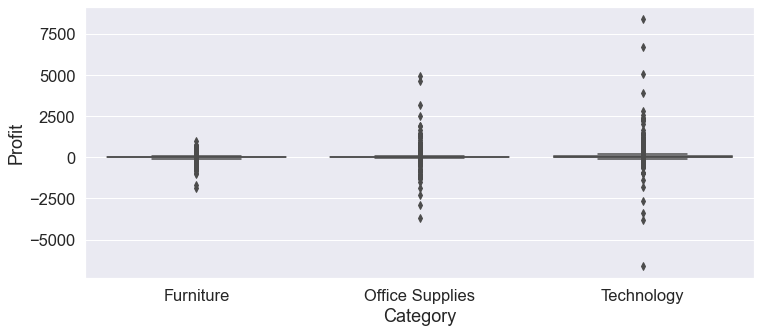

In [54]:
plt.figure(figsize = (12,5))
sns.set(font_scale=1.5)
sns.boxplot(x='Category',y='Profit',data=data)

* Variation in Technology sector is more as compared to other two sector

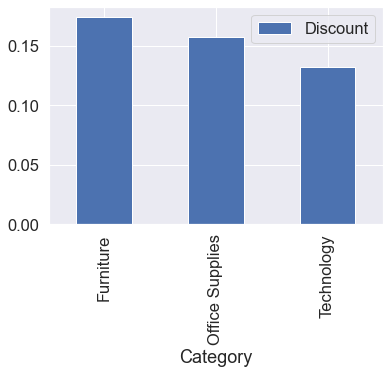

In [55]:
pivot=pd.pivot_table(data,index='Category',values='Discount')
pivot.plot(kind='bar')

* Furniture have been sold at more discount than technology

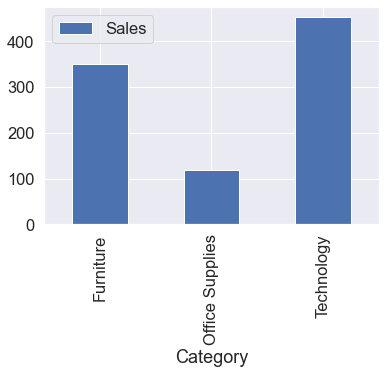

In [56]:
pivot=pd.pivot_table(data,index='Category',values='Sales')
pivot.plot(kind='bar')

* Despite giving more discount on furniture than technology,it has lesser sell than technology.

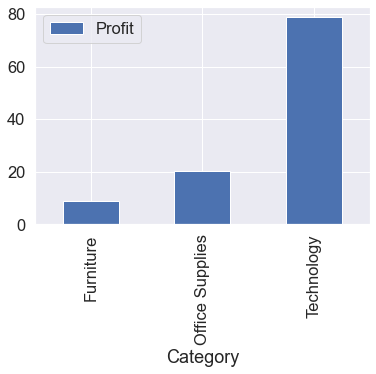

In [57]:
pivot=pd.pivot_table(data,index='Category',values='Profit')
pivot.plot(kind='bar')

* The profit is also highest in technology sector

## Summary:

### 1.What are total Sales and Profits of the company?

* Total Sales = 2,296,195.56 USD
* Total Profits = 286,241.42 USD

### 2.Top 10 States by Sales and Profits
* Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'.
* Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'.
* Californi and New York are far ahead of their competitor states in terms of Profits.

### 3.Relational Analysis
* When discount is 0, the profit is increasing linearly with increase of sales.
* Because of discounts offered,we are in loss in some category.
* Discounts are causing losses.

### 4.Distribution of Profits across different region
* Overall each segment is profitable.
* In central region,the furniture sector is in loss.
* Irrespective of the shipping mode,losses are in furniture sector.

### 5. Performance by State in Central Region
* Texas and Illinois are the only two states with losses in furniture category in the Central Region.

* Texas and Illinois are the only two states that is providing discounts and that too huge.
~60% on Furnishings
~30% on Bookcases and Chairs
~50% disount on Tables in Illinois and 30% in Texas

* All cities of Illinois are in loss and most of the losses are occuring in tables.A discount of 30% or more have been given in the cities and most of them are in furnishing.

* Except one city, All cities of Texas are in loss too and most of the losses are in furnishing category.

### 6. Are discounts worth giving for i.e are they really increasing sales 
~ No
* Except bookcases, sales for all other sub-category is going down with increase of discount.

* The overall sales is going down even after giving discounts.